## **Setup**

In [2]:
# Add files to Google Colab
from google.colab import files
uploaded = files.upload()

Saving api_keys.py to api_keys.py


In [3]:
!pip install citipy

     |████████████████████████████████| 563kB 6.4MB/s 
  Created wheel for citipy: filename=citipy-0.0.5-cp36-none-any.whl size=559702 sha256=abc05e26b5ea8515f4c3b796af4098163b9e70490cba158f2e40798e33c15414
  Stored in directory: /root/.cache/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

## **Perform API Calls**

*   Perform a weather check on each city using a series of successive API calls.
*   Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set lists for the dataframe
city_name = []
lat = []
lng = []
max_temp = []
clouds = []
humidity = []
wind_speed = []
country = []
date = []

# set initial count quantities for organization
count_one = 0
set_one = 1

print("Beginning Data Retrieval")    
print("-----------------------------")
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | vestmannaeyjar
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | biryusinsk
Processing Record 8 of Set 1 | sao jose da coroa grande
Processing Record 9 of Set 1 | hilo
City not found. Skipping...
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | pagudpud
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | matagami
City not found. Skipping...
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | norrtalj

## **Convert Raw Data to DataFrame**
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Create dictionary to hold dataframe
weather_dict = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date,}

In [9]:
#Create dataframe

weather_df = pd.DataFrame(weather_dict)

In [ ]:
#Export to CSV

weather_df.to_csv(output_data_file)

In [11]:
#Show count

weather_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [32]:
#Display the dataframe

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,65.00,-15.00,48.20,81,75,6.93,IS,1598740966
1,upernavik,72.79,-56.15,40.64,72,0,5.28,GL,1598740966
2,cidreira,-30.18,-50.21,66.69,81,49,8.77,BR,1598740873
3,vestmannaeyjar,63.44,-20.27,52.56,90,97,10.89,IS,1598740966
4,saint-pierre,-21.34,55.48,69.80,73,25,9.17,RE,1598740967
...,...,...,...,...,...,...,...,...,...
583,tutoia,-2.76,-42.27,80.78,76,7,16.60,BR,1598741094
584,port macquarie,-7.03,29.76,75.76,55,0,3.20,CD,1598740975
585,narasaraopet,16.25,80.07,79.66,82,100,5.01,IN,1598740925
586,ust-tsilma,65.44,52.15,46.33,89,24,5.86,RU,1598741094


## **Inspect the data and remove the cities where the humidity > 100%.¶**
* Skip this step if there are no cities that have humidity > 100%.

In [13]:
high_humidity = weather_df.loc[weather_df["Humidity"] > 100, :]

print(high_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


## **Plotting the Data**
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

FileNotFoundError: ignored

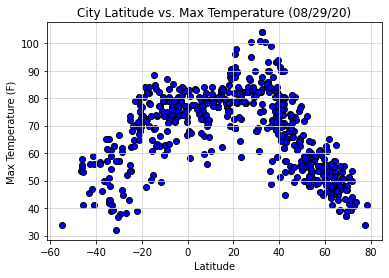

In [18]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (08/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

### Latitude vs. Humidity Plot

FileNotFoundError: ignored

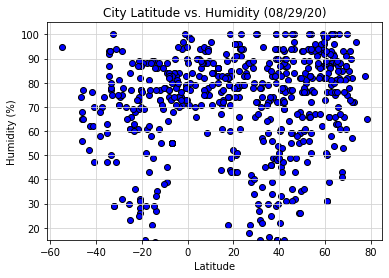

In [20]:

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (08/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

### Latitude vs. Cloudiness Plot

FileNotFoundError: ignored

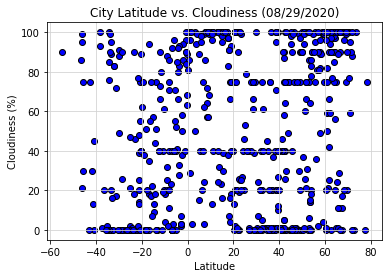

In [22]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (08/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

### Latitude vs. Wind Speed Plot

FileNotFoundError: ignored

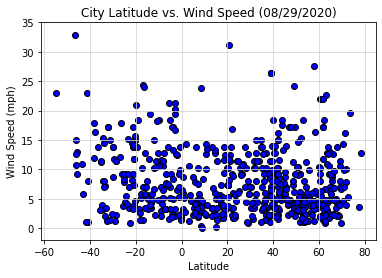

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (08/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,35)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## **Linear Regression**

In [42]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_df.loc[weather_df["Lat"] > 0, :]
southern_df = weather_df.loc[weather_df["Lat"] < 0, :]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5324288406423827


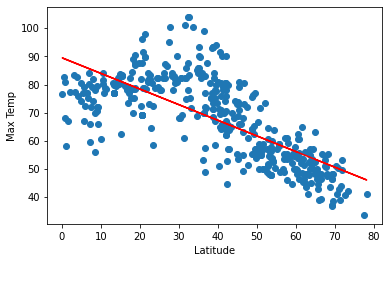

In [43]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5247052223082558


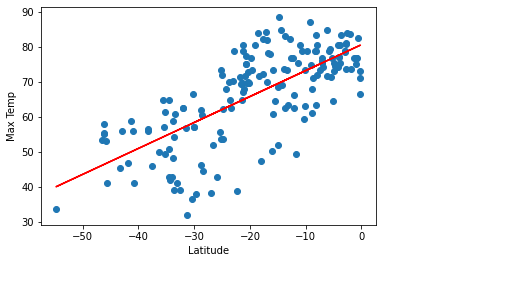

In [52]:
x_values2 = southern_df["Lat"]
y_values2 = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 2.7726860688383078e-05


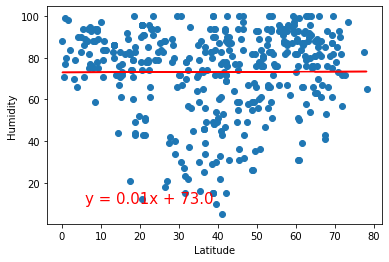

In [55]:
x_values3 = northern_df["Lat"]
y_values3 = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,"r-")
plt.annotate(line_eq3,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is: 0.018769512815177553


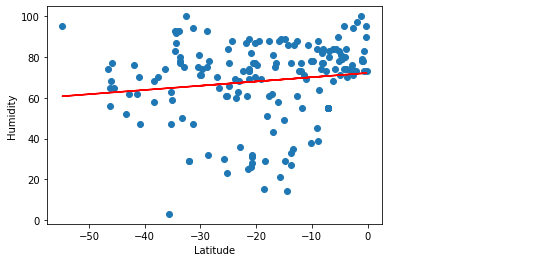

In [56]:
x_values4 = southern_df["Lat"]
y_values4 = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq4,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002708737645012278


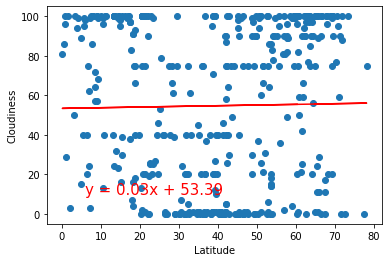

In [57]:
x_values5 = northern_df["Lat"]
y_values5 = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values5,y_values5)
plt.plot(x_values5,regress_values5,"r-")
plt.annotate(line_eq5,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0006742716865119821


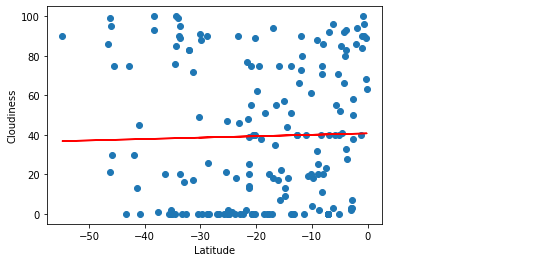

In [58]:
x_values6 = southern_df["Lat"]
y_values6 = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values6,y_values6)
plt.plot(x_values6,regress_values6,"r-")
plt.annotate(line_eq6,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00046927357340637043


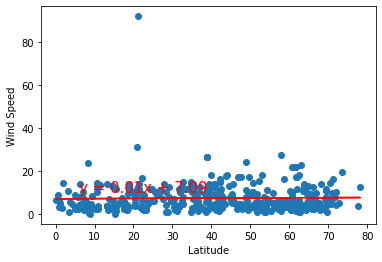

In [59]:
x_values7 = northern_df["Lat"]
y_values7 = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values7,y_values7)
plt.plot(x_values7,regress_values7,"r-")
plt.annotate(line_eq7,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025316193481050818


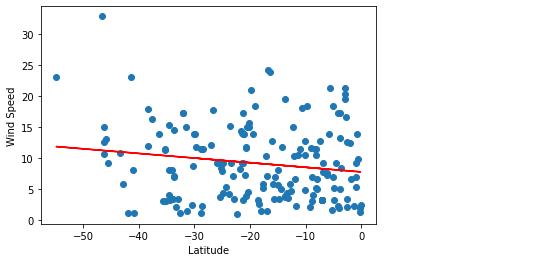

In [60]:
x_values8 = southern_df["Lat"]
y_values8 = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)
regress_values8 = x_values8 * slope + intercept
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values8,y_values8)
plt.plot(x_values8,regress_values8,"r-")
plt.annotate(line_eq8,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()